### Imports

In [42]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples # silhouette_score
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import Image
import numpy as np
import pandas as pd

### K-means

`Clustering` helps to find group of similar objects that are more related to each other than to objects in other groups

* Grouping of documents, music and movies by different topics

* Finding customers that share similar interests based on common purchase behaviors

`k-means` `scikit-learn` implementation

`k-means` is a `prototype-based` clustering. *Prototype based clustering* means that each cluster is represented by a `prototype` which is usually either the `centroid`(*average*) of similar points with continous features, or the `medoid` (*the most representative* or the point that minimizes the distance to all other points that belong to a cluster)

**Drawbacks**

* You have to specify the number of clusters $k$, `a priori`; if not chosen appropraitely can lead to the bad performance of the algorithm. 

    * We can `elbow` method and `silhouette` plots to find the optimal number of clusters.

In [2]:
X, y = make_blobs(
    n_samples=150, 
    n_features=2, 
    centers=3,
    cluster_std=0.5, 
    shuffle=True,
    random_state=0)

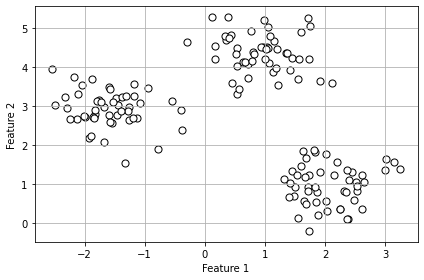

In [3]:
plt.scatter(X[:, 0],
    X[:, 1], 
    c='white',
    marker='o',
    edgecolors='black',
    s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

**k-means 4 steps:**
1. Randomly pick $k$ centroids from the examples as initial cluster centers

2. Assign each example to the closest centroid, $\mu^{(j)}, j \in {1, ..., k}$ # $Jth$ dimension (feature column) of the example inputs, $x$ and $y$

3. Move the `centriods` to the center of the new assigned examples

4. Repeat the above steps until the centroids do not change or a user-defined tolerance or maximum number of iterations is reached.

**Distance measure**

Squared Euclidean distance

$d(x, y)^2 = \sum_{i=1}^{m} (x_i - y_i)^2 = ||x-y||^2_2$

**K-means minimization objective function**

Based on the `euclidean distance metric`, we can describe the `k-means` as a simple minimization problem, an interative approach of minimizing the within-cluster `sum of squared errors (SSE)` called the `cluster inertia`:

$SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} W^{(i, j)} ||x^{(i)} - \mu^{(j)}||^2_2$

* $\mu^{(j)}$ is the representative point (centriod) for cluster $j$

* $W^{(i, j)} = 1$ if the example, $x^{(i)}$ is in cluster $j$ or 0 otherwise 


In [4]:
# stop here

In [5]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

In [6]:
y_km = km.fit_predict(X)

* `n_init=10`: `k-means` to run algorithm for 10 times with different initial centroids to find the best one wiht the lowest SSE

* `max_iter=300`: maximum number of iterations for each run. Note that `k-means` stops early if it converges before the `max_iter`. It is possible that k-means does not converge for a particular run, which can be problematics (`computationally expensive`) if we choose relatively large values for `max_iter`

* `tol`: hyperparameter that controls the tolerance with regards to the changes in the `within-cluster SSE`. One way to deal with convergence issues is to choose a larger values for `tol`

* Note: In `k-means` it is possible to have one or more clusters empty. This problems does not exist for `fuzzy C-means`. Empty clusters are accounted for in `scikit-learn` implementation by searching for the example that is farthest away from the centroid of the empty cluster, then it will reassign the centriod to be this farthest point

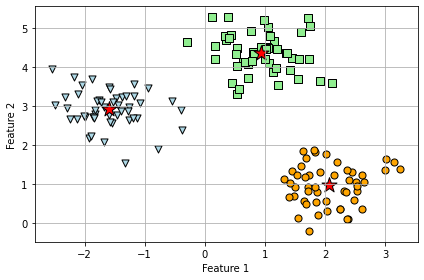

In [7]:
plt.scatter(X[y_km == 0, 0], 
            X[y_km == 0, 1], 
            c='lightgreen', 
            marker='s', edgecolor='black',
             s=50, label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c='orange',
            marker='o',
            edgecolor='black',
            s=50,
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            c='lightblue',
            marker='v',
            edgecolor='black',
            s=50,
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolors='black',
            label='centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

*In K-means, clusters do not overlap and also assume that there is at least one item in each cluster*

### K-means ++

Places the `centrioids` far away from each other which leads to better and more consistent results than classic `k-means` 


*k-means++: The Advantages of Careful Seeding by D. Arthur and S. Vassilvitskii in Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, pages 1027-1035. Society for Industrial and Applied Mathematics, 2007)*

**k-means ++ steps**

1. Initialize an empty set, **M**, to store the $k$ centriods being selected

2. Randomly choose the first centroid, $\mu^{(j)}$, from the input examples and assign it to **M**

3. For each example, $x^{(i)}$, compute the distance to each centroid in **M**, $d(x^{(i)}, M)$

4. To randomly select the next centroid, $\mu^{(p)}$, use a weighted probability distribution equal to $\frac{d(\mu^{(p)}, M)^2}{\sum_i d(x^{(i)}, M)^2}$. For instance, we collect all points in an array and choose the weighted random sampling, such that the larger the squared distance, the more likely a point get chosen as a centriod

5. Repeat *steps 3 and 4* until $k$ centroids are chosen

6. Proceed with the classic `k-means` algorithm

### Hard vs Soft Clustering

`Hard clustering` assigns an explicit label to each example, while `soft clustering(fuzzy clustering)` assigns a
 label to an example to one or more clusters

 `fuzzy C-means algorithm` (*FCM*) also called *Soft k-means* or *Fuzzy k-means*

*(A Fuzzy Relative of the ISODATA Process and Its Use in Detecting Compact Well-Separated Clusters, 1973).*

 *(Pattern Recognition with Fuzzy Objective Function Algorithms, Springer Science+Business Media, 2013).* - `James C. Bedzek`

IN `FCM` we replace the hard cluster assignment with probabilities for each point belonging to each cluster.

In [8]:
# hard clustering
Image(url="../images/hard_cluster.png", )

In [9]:
# soft clustering
Image(url="../images/soft_clustering.png", )

**FCM in 4 steps**

1. Specify the number of $k$ centriods and randomly assign the cluster membership for each point 

2. Compute the cluster centroids, $\mu^{(j)}$, $j \in {1, ..., k}$

3. Update the cluster membership for each point

4. Repeat steps 2 and 3 until the centroids do not change or a user-defined tolerance or maximum number of iterations is reached.

**FCM objective function**


$SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} W^{(i, j)^m} ||x^{(i)} - \mu^{(j)}||^2_2$

However $W^{(i, j)}$ is not binary like that of `k-means` but a probability that a point belongs to a cluster. Also there is an additional parameter $m$; any number greater than or equal to 1 (typically $m=2$) i.e. `fuzziness coefficient or fuzzifier` controls the degree of fuzziness of the clusters.

The larger the value of $m$, the smaller the cluster membership $W^{(i,j)}$, and the more fuzzy the clusters are.

$W^{(i,j)} = [\sum_{c=1}^k (\frac{||x^{(i)} - \mu^{(j)}||_2}{||x^{(i)} - \mu^{(c)}||_2})^{\frac{2}{m-1}}]^{-1}$

for example `k=3`

$W^{(i,j)} = [ (\frac{||x^{(i)} - \mu^{(j)}||_2}{||x^{(i)} - \mu^{(1)}||_2})^{\frac{2}{m-1}} + (\frac{||x^{(i)} - \mu^{(j)}||_2}{||x^{(i)} - \mu^{(2)}||_2})^{\frac{2}{m-1}} + (\frac{||x^{(i)} - \mu^{(j)}||_2}{||x^{(i)} - \mu^{(3)}||_2})^{\frac{2}{m-1}}]^{-1}$

**Centroid calculation**

$\mu^{(j)} = \frac{\sum_{i=1}^n w^{(i,j)^m} x^{(i)}}{\sum_{i=1}^n w^{(i,j)^m}}$

* `FCM` is computationally more expensive than `K-means` but requires less iteration to reach convergence

* Both `k-means` and `FCM` produce similar clusters


*(Comparative Analysis of k-means and Fuzzy C-Means Algorithms by S. Ghosh and S. K. Dubey, IJACSA, 4: 35–38, 2013).*

[scikit-fuzzy implementation](https://github.com/scikit-fuzzy/scikit-fuzzy)

### Finding Optimal Clusters - Elbow Methods

Uses the within-cluster SSE(distortion) to compare the performance of different k-means clustering

In [10]:
print(f"Distortion: {km.inertia_:.2f}")

Distortion: 72.48


The rational behind the `Elbow method` is to find the value of $k$, where the distortion begins to decrease more rapidly

In [11]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
                n_init=10,
                init='k-means++',
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

**Plot the distortions**

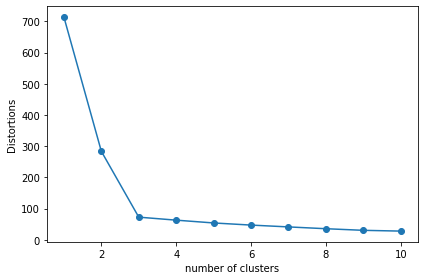

In [12]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

It is evident that $k=3$ is the correct value for `n_clusters`

### Silhouette Analysis

* Basically measure how tightly grouped the examples in the clusters are 

* Can also be used in other clustering algorithms other than `k-means`

**Calculating the `silhoutte coefficients` for a single training example**

1. Calculate the `cluster cohesion`, $a^{(i)}$, as the average distance between an example $x^{(i)}$, and all other examples in the same cluster

2. Calculate the `cluster separation`, $b^{(i)}$, as the average distance between an example $x^{(i)}$, and all other examples in the nearest clusters

3. Calculate the silhouette, $s^{(i)}$ as the difference between `cluster separation` and `cluster cohesion` divided by the maximum of the two

4. Silhoutte coefficient ranges from $[-1, 1]$

$S^{(i)} = \frac{b^{(i)} - a^{(i)}}{max\{b^{(i)}, a^{(i)}\}}$

**Scikit-learn implementation**

In [13]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

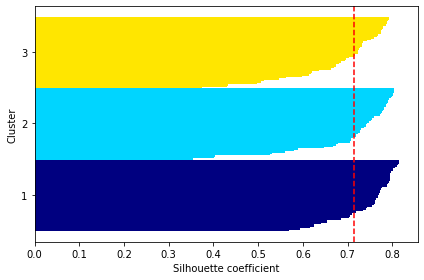

In [14]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
# calculate silhouette scores
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# lets plot the silhouette plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append(y_ax_lower + (y_ax_upper - y_ax_lower) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, 
            color='red', 
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


1. We can quickly scrutinize the sizes of the diferrent clusters and identify clusters that contain outliers

2. As you can see the fig.1 above the `silhoutte coefficient` are not close to 0 and are approximately equally far away from the average silhouette score, which indicates that the clusters are well-separated

**An example of bad clustering with silhoutte analysis**

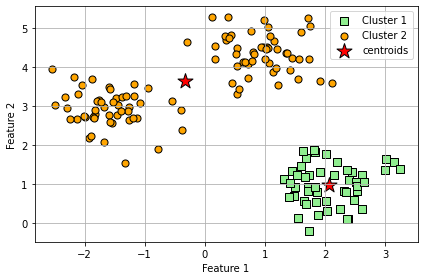

In [15]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], 
            X[y_km == 0, 1], 
            c='lightgreen', 
            marker='s', edgecolor='black',
             s=50, label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            c='orange',
            marker='o',
            edgecolor='black',
            s=50,
            label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolors='black',
            label='centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

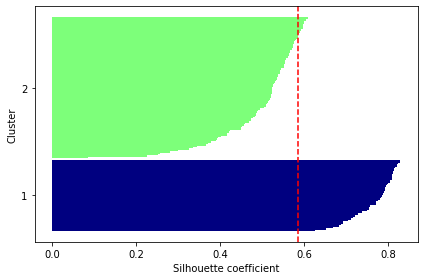

In [16]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
# calculate silhouette scores
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# lets plot the silhouette plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append(y_ax_lower + (y_ax_upper - y_ax_lower) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, 
            color='red', 
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


The silhouette has different length and width which an indication of bad or least suboptimal clustering

### Hierarchical Clustering

Two main approaches to hierarchical clustering are: `Agglomerative` and `Divisive`

`Divisive`: The algorithm starts with a single cluster that encompasses the entire dataset and then progressively split the cluster into smaller clusters until each cluster contains only one example

`Agglomerative`: takes the opposite approach; the algorithm starts with each example as a single cluster and then progressively merges the closest pairs of  clusters until there is only one cluster

**Pros**

* Allows to plot `dendrogram` (*visualization of a binary hierarchical clustering*)

* Also you don't need to specify the number of clusters upfront

**Two standard algorithms for agglomerative clustering**

1. `Single linkage`: we compute the distance between the most `similar members` for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest


2. `Complete linkage`: we compute the distance between the most `dissimilar members` for each pair of clusters and merge the two clusters for which the distance between the most dissimilar members is the smallest

In [17]:
Image(url="../images/agglomerative_clustering.png", )

**Alternative Linkages**

* `Average linkage`: we merge the cluster pairs based on the minimum average distance between all group members in the two clusters

* `Ward linkage`: the two clusters that lead to the minimum increase of the `total within-cluster sum of squares` are merged

**Complete linkage Algorithm**

1. Compute a pair-wise distance matrix of all examples 

2. Represent each data point as a singleton cluster

3. Merge the two closest clusters based on the distance betwen the most dissimilar (distant) members

4. Update the cluster linkage matrix

5. Repeat `step 2-4` until one single cluster remains

**Performing hierarchical clustering on a distance matrix**

In [18]:
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


**distance matrix**

In [19]:
# calculated the euclidean distance between each pair of inputs examples in our dataset based on X, Y, Z
# we provided the condensed matrix returned by pdist as input to the squareform function to 
# create a symmetric matrix of pairwise distances
row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')), 
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


**Complete linkage agglomeration to our clusters**

In [20]:
# incorrect - row_clusters = linkage(row_dist, method='complete', metric='euclidean')
row_clusters = linkage(pdist(df, metric='euclidean'), 
                      method='complete')

# or corrrect - row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [21]:
linkage_df = pd.DataFrame(row_clusters,
                            columns=['row label 1', 
                                     'row label 2', 
                                     'distance', 
                                     'no. of items in clust.'],
                            index=[f'cluster {(i + 1)}' for i in range(row_clusters.shape[0])])
linkage_df

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


**dendrogram**

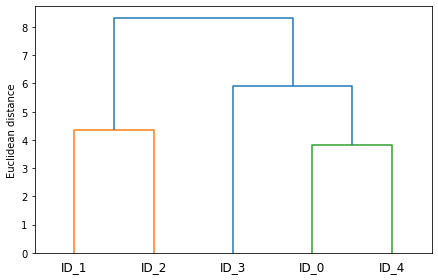

In [22]:
row_dendr = dendrogram(row_clusters, 
                       labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Attaching dendograms to a heat map**

/var/folders/4b/k8j98vrn2x9dldnwhb4hzdk40000gn/T/ipykernel_92317/73244462.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/4b/k8j98vrn2x9dldnwhb4hzdk40000gn/T/ipykernel_92317/73244462.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


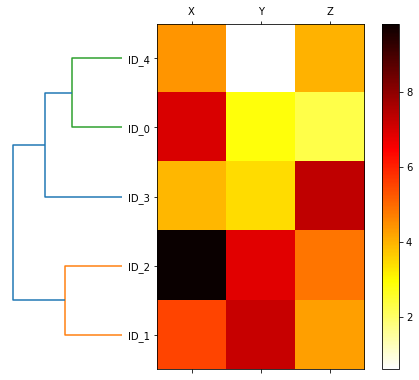

In [23]:
# create a figure object and define the x and y axis
fig = plt.figure(figsize=(8, 8), facecolor='white')
# define the x and y axis, width and height of the plot
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,    
                        orientation='left')
# we reorder the rows of our dataframe to match the order of the dendrogram
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
# we construct a heatmap of the reordered dataframe
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, 
                  interpolation='nearest', 
                  cmap='hot_r')
# remove he axis ticks and hide the axis spines of the dendogram
axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

As you can see the order of rows in the heatmap reflects the clustering of the examples in the dendrogram

**Applying Agglomerative clustering via Scikit-learn**

In [24]:
# by setting the value for n_clusters  we want to prune the hierarichical cluster tree
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean',
                             linkage='complete')

labels = ac.fit_predict(X)


In [25]:
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


overall the result are consistent with what was showed on the dendogram with `scipy`

In [26]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean',
                             linkage='complete')

labels = ac.fit_predict(X)

In [27]:
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


### DBSCAN

**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise

Assign cluster labels based on dense regions of points. In DBSCAN, the notion of `density` is the number of points with a specfied radius, $\epsilon$

* Does not make assumptions about spherical clusters like `k-means`

* Does not partition dataset into hierarchies that require manual cut-off points

* Does not necessarily assign each point to a cluster but is capable of removing noise points (outliers)

**`DBSCAN` assigns a special label to each example using the following criteria:**

1. A point is considered a `core point` if at least a specified number(*MinPts*) of neighbouring points fall with the specified radius, $\epsilon$

2. A `border point` is a point that has fewer neighbors than MinPts with $\epsilon$, but lies within the $\epsilon$ radius of the core point


3. All other points that are neither `core` nor `border` points are considered `noise points`


After labeling the pointss as `core`, `border` or `noise`, the DBSCAN algorithm can be summarized in two simple steps:

1. Form a separated cluster for each `core point` or `connected group of core points` (*Core points are connected if they are no farther away than $\epsilon$*)

2. Assign each `border point` to the cluster of its corresponding `core point`

In [28]:
Image(url="../images/dbscan_cluster.png", )

**moon dataset**

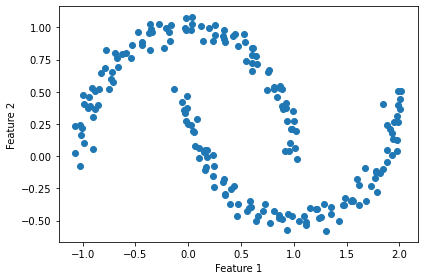

In [30]:
X, y = make_moons(n_samples=200,
                 noise=0.05, 
                 random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

**k-means and agglomerative clustering on moon-shaped data**

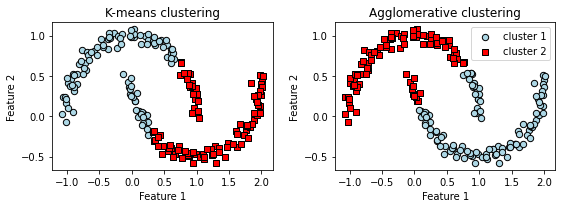

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2,
            random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km ==0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')

ax1.scatter(X[y_km == 1, 0],
            X[y_km ==1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# agglomerative clustering

ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')

y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')

ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')

ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')


plt.legend()
plt.tight_layout()
plt.show()


we can see that `k-means` was unable to separate the two clusters and also `hierarchical clustering algorithm` was challenged by those complex shapes

**Now Lets try `DBSCAN`**

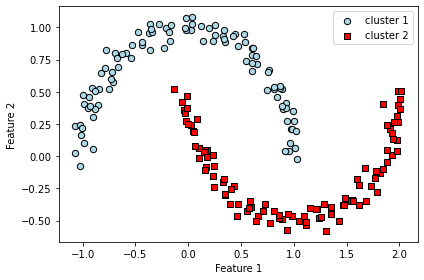

In [43]:
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')

plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.tight_layout()
plt.show()

**Cons of DBSCAN**

* Affected by the curse of dimensionality, especially if we are using `euclidean distance`. Also affects `k-means` and `hierarchical clustering` that use euclidean distance 

* Two hyperparameters (`MinPts` and $\epsilon$) to tune, finding a good combination can be problematic

**Graph based clustering**

An example is `spectral clustering algorithm`

Uses eigenvectors of a similarity or distance matrix to derive the cluster relationships

Resource: [A tutorial on spectral clustering, Statistics and Computing, 17(4): 395-416, 2007](https://arxiv.org/pdf/0711.0189v1.pdf)

### Conclusion

Note that, in practice, it is not always obvious which clustering algorithm will perform best on a given dataset, 

especially if the data comes in multiple dimensions that make it hard or impossible to visualize. Furthermore, it is 

important to emphasize that a successful clustering does not only depend on the `algorithm` and its `hyperparameters`; 

rather, the choice of an `appropriate distance metric` and the use of `domain knowledge` that can help to guide the 

experimental setup can be even more important.

In the context of the `curse of dimensionality`, it is thus common practice to apply `dimensionality reduction techniques` 

prior to performing clustering. Such dimensionality reduction techniques for unsupervised datasets include `principal component analysis` and `t-SNE`.

particularly common to compress datasets down to `two-dimensional subspaces`, which allows us to visualize the clusters 

and assigned labels using `two-dimensional scatterplots`, which are particularly helpful for evaluating the results.